In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from PIL import Image, ImageFilter
import cv2
%matplotlib inline
#%matplotlib notebook

C:\Users\admin\miniconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [2]:
import os
os.chdir('Images')
print(os.getcwd())

C:\Users\admin\Lab_training\Week7_8\Images


## Image for use

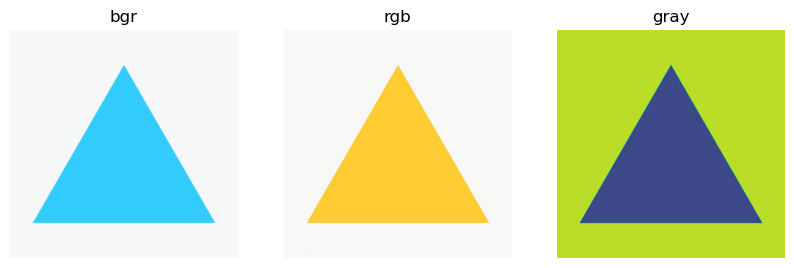

In [3]:
img = cv2.imread('triangle.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
list1 = [img, img_rgb, img_gray]
mapping1 = {0:'bgr', 1:'rgb', 2:'gray'}
fig = plt.figure(figsize = (10,5))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    ax.set_title(mapping1[i])
    ax.axis('off')
    ax.imshow(list1[i])

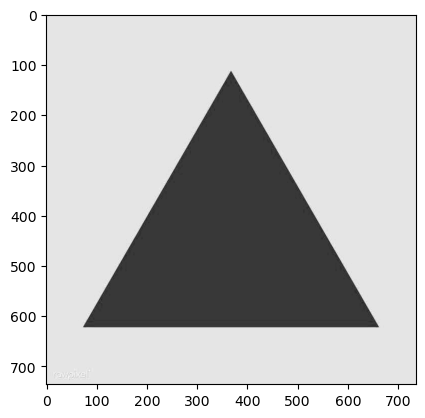

In [4]:
plt.imshow(img_gray, cmap = 'gray')

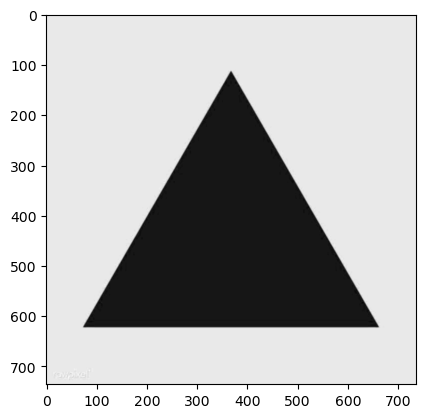

In [5]:
# Step 1: Canny
img_blur = cv2.GaussianBlur(img_gray, ksize = (3,3), sigmaX = 1, sigmaY = 1)
plt.figure()
plt.imshow(img_blur, cmap = 'gray')

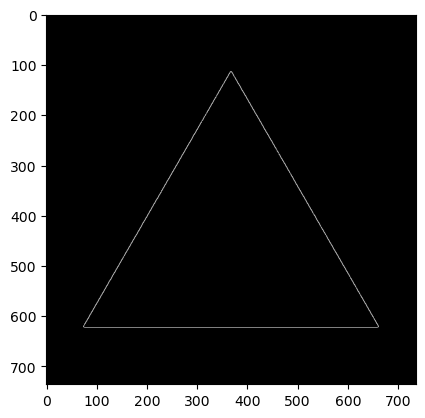

In [6]:
# canny
img_canny = cv2.Canny(img_gray, 100,150)
plt.imshow(img_canny, cmap = 'gray')

In [7]:
def hough_detection(img, type_ = 'line', r_bins = 500, theta_bins = 500, threshold = 100):
    H, W = img.shape
    if type_ == 'line':
        num_r = round(np.sqrt(H**2+W**2))
        num_theta = 360
        
        thetas = np.linspace(0, num_theta, theta_bins)
        rs = np.linspace(0, num_r, r_bins)
        
        hough_sys = np.zeros((theta_bins, r_bins))
        where = np.where(img == 255)
        
        for (h, v) in zip(where[0], where[1]):
            for theta in thetas:
                if theta>=180 and theta <=270:
                    continue
                r = np.cos(np.deg2rad(theta))*h+np.sin(np.deg2rad(theta))*v
                if r<0:
                    r = np.argmin(np.abs(rs+r))
                    theta_ = theta+180
                    if theta_>=360:
                        theta_ -= 360
                    theta_ = np.argmin(np.abs(thetas - theta_))
                else:
                    theta_ = np.argmin(np.abs(thetas - theta))
                    r = np.argmin(np.abs(rs-r))
                hough_sys[theta_, r]+=2 # accumulator 
        plt.figure()
        plt.imshow(hough_sys, cmap ='viridis')
        # thresholding
        where = np.where(hough_sys>=threshold)
        parameters_theta = thetas[where[0]]
        parameters_r = rs[where[1]]
        line_parameters = (parameters_theta, parameters_r)
        return line_parameters
    
    if type_ = 'circle':
        pass

In [8]:
def hough_show(img, line_parameters):
    image = img.copy()
    for (theta, r) in zip(line_parameters[0], line_parameters[1]):
        b = np.cos(np.deg2rad(theta))
        a = np.sin(np.deg2rad(theta))
        x0 = a*r
        y0 = b*r
        x1 = round(x0 + 1000*(-b))
        y1 = round(y0 + 1000*(a))
        x2 = round(x0 - 1000*(-b))
        y2 = round(y0 - 1000*(a))
        image = cv2.line(image, (x1, y1), (x2,y2),(255,0,0),thickness = 2)
    return image

(array([  0.        ,  59.1643454 ,  59.1643454 ,  59.1643454 ,
        59.1643454 ,  59.1643454 ,  59.1643454 ,  59.1643454 ,
        60.16713092,  60.16713092,  60.16713092, 118.32869081,
       118.32869081, 118.32869081, 118.32869081, 118.32869081,
       118.32869081, 118.32869081, 118.32869081, 118.32869081,
       118.32869081, 118.32869081, 119.33147632, 119.33147632,
       119.33147632, 119.33147632, 119.33147632, 119.33147632,
       119.33147632, 119.33147632, 119.33147632, 120.33426184,
       120.33426184, 120.33426184, 120.33426184, 120.33426184,
       120.33426184, 120.33426184, 120.33426184, 120.33426184,
       120.33426184, 121.33704735, 121.33704735, 121.33704735,
       121.33704735, 121.33704735, 121.33704735, 121.33704735,
       121.33704735, 121.33704735, 121.33704735, 357.99442897,
       357.99442897, 357.99442897, 357.99442897, 357.99442897,
       357.99442897, 357.99442897, 357.99442897, 357.99442897,
       357.99442897, 357.99442897, 357.99442897, 360. 

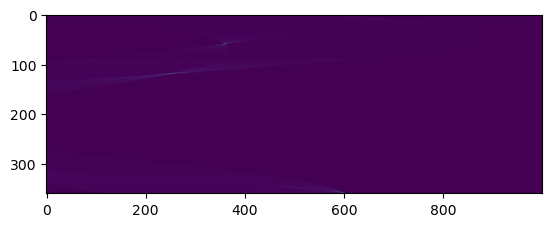

In [13]:
line_parameters = hough_detection(img_canny, type_='line', threshold = 180, r_bins = 1000, theta_bins = 360)
print(line_parameters)

In [14]:
new = hough_show(img_rgb, line_parameters)

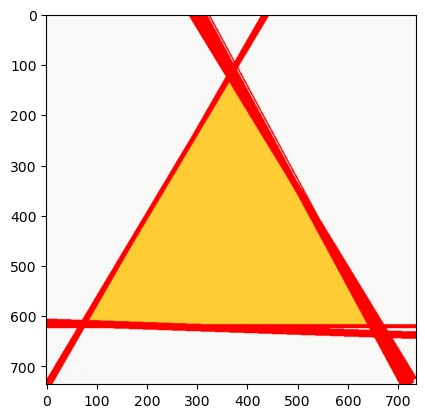

In [15]:
plt.figure()
plt.imshow(new)

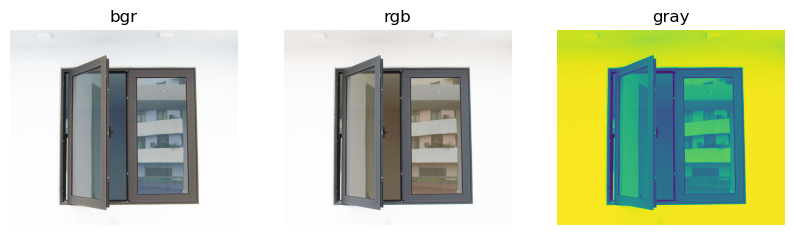

In [19]:
# a more complex image
img2 = cv2.imread('window.jpg')
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
list2 = [img2, img_rgb2, img_gray2]
mapping2 = {0:'bgr', 1:'rgb', 2:'gray'}
fig = plt.figure(figsize = (10,5))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    ax.set_title(mapping2[i])
    ax.axis('off')
    ax.imshow(list2[i])

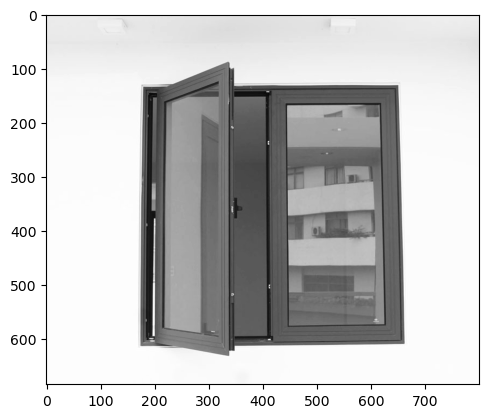

In [21]:
plt.imshow(img_gray2, cmap = 'gray')

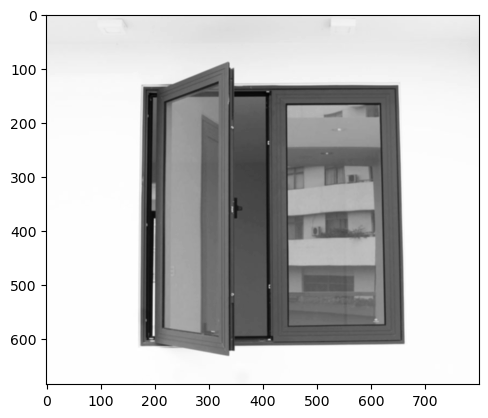

In [22]:
# Step 1: Canny
img_blur2 = cv2.GaussianBlur(img_gray2, ksize = (3,3), sigmaX = 1, sigmaY = 1)
plt.figure()
plt.imshow(img_blur2, cmap = 'gray')

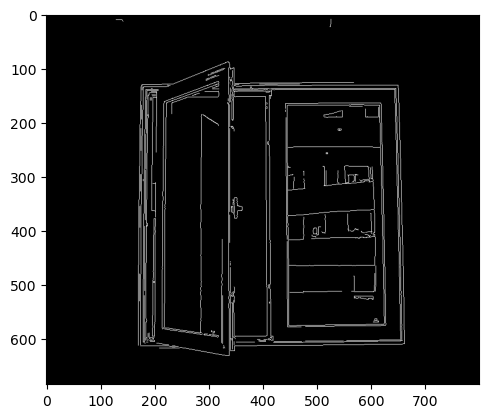

In [23]:
# canny
img_canny2 = cv2.Canny(img_gray2, 100,150)
plt.imshow(img_canny2, cmap = 'gray')

(array([ 90.25069638,  90.25069638,  90.25069638,  90.25069638,
        90.25069638,  90.25069638,  90.25069638,  90.25069638,
        90.25069638,  90.25069638,  90.25069638,  90.25069638,
        91.25348189,  91.25348189,  91.25348189,  91.25348189,
        91.25348189,  91.25348189,  91.25348189,  91.25348189,
        92.25626741,  92.25626741, 357.99442897, 357.99442897,
       357.99442897, 357.99442897]), array([170.92785571, 173.03807615, 177.25851703, 179.36873747,
       181.47895792, 194.14028056, 335.5250501 , 337.63527054,
       405.16232465, 441.03607214, 443.14629259, 645.72745491,
       166.70741483, 168.81763527, 170.92785571, 173.03807615,
       436.81563126, 611.96392786, 641.50701403, 643.61723447,
       635.17635271, 637.28657315, 116.06212425, 118.17234469,
       122.39278557, 124.50300601]))


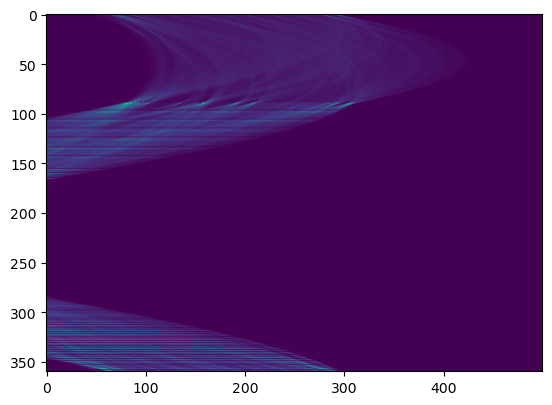

In [40]:
line_parameters2 = hough_detection(img_canny2, type_='line', threshold = 1000, r_bins = 500, theta_bins = 360)
print(line_parameters2)

In [41]:
new2 = hough_show(img_rgb2, line_parameters2)

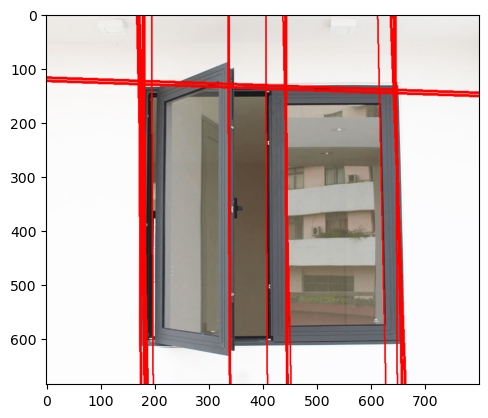

In [42]:
plt.figure()
plt.imshow(new2)